In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg 
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("/content/final_data1.csv",index_col=0,delimiter=';')

In [ ]:
df

,Year,Month,Day,Hour,Air pressure,Air temperature,RAD radiation,UVB radiation,Wind speed,Relative humidity,Precipitation,Wind direction,CO,NO2,NOx,O3,PM2.5,PM10,SO2,C6H6
0,2015,1,1,0,1012.0,-6.6,0.0,0.0,1.6,62.8,1.6,278.0,0.575000,18.00000,20.00000,7.00000,19.0000,32.00000,35.778146,5.01000
1,2015,1,1,1,1011.0,-7.4,0.0,0.0,1.6,69.6,1.5,279.0,0.581000,20.00000,25.00000,7.00000,13.0000,50.00000,244.272000,5.25388
2,2015,1,1,2,1011.0,-7.1,0.0,0.0,1.6,72.3,1.4,286.0,0.678000,20.00000,25.00000,6.00000,11.0000,34.00000,102.633000,4.74133
3,2015,1,1,3,1012.0,-6.5,0.0,0.0,1.5,71.0,1.5,292.0,0.686000,21.00000,24.00000,6.00000,9.0000,29.00000,77.725900,4.66580
4,2015,1,1,4,1012.0,-5.6,0.0,0.0,1.7,69.2,1.7,299.0,0.653000,22.00000,25.00000,6.00000,10.0000,21.00000,69.562100,4.77038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2017,12,31,19,987.3,7.2,2.0,0.0,2.2,79.2,2.2,255.2,0.261702,13.07010,14.59970,5.07044,50.3412,12.50000,12.479400,0.10118
8756,2017,12,31,20,987.4,7.6,0.8,0.0,1.4,78.9,1.4,242.9,0.276685,13.74520,15.52860,4.16316,48.5977,9.20527,12.922200,0.05296
8757,2017,12,31,21,987.3,7.5,1.0,0.0,1.8,78.4,1.8,237.5,0.275513,12.86670,14.56780,4.20014,49.8737,12.14580,13.700800,0.05363
8758,2017,12,31,22,986.9,7.4,1.0,0.0,1.7,78.4,1.7,238.2,0.259061,8.61409,9.90682,3.42904,52.7504,13.60000,13.573100,0.04195


In [ ]:
df.describe()

,Year,Month,Day,Hour,Air pressure,Air temperature,RAD radiation,UVB radiation,Wind speed,Relative humidity,Precipitation,Wind direction,CO,NO2,NOx,O3,PM2.5,PM10,SO2,C6H6
count,26304.00000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000
mean,2016.00000,6.521898,15.732664,11.500000,998.402792,7.954657,107.287473,0.066374,1.099145,75.537034,1.101099,218.344218,0.407240,23.691196,36.404095,4.066015,46.106990,23.582241,34.115177,1.237846
std,0.81614,3.449052,8.801537,6.922318,8.431678,8.728090,185.045449,0.114022,0.751908,20.868101,0.752192,104.664084,0.272144,15.825855,42.411309,4.807493,31.015661,24.126049,25.118772,1.768032
min,2015.00000,1.000000,1.000000,0.000000,957.000000,-16.800000,0.000000,0.000000,0.000000,20.100000,0.000000,0.000000,0.113336,0.254400,1.000000,0.000000,-0.038020,0.000000,6.356000,0.000100
25%,2015.00000,4.000000,8.000000,5.750000,993.600000,1.400000,1.500000,0.000000,0.600000,59.700000,0.600000,123.500000,0.256000,11.822725,13.901175,1.577577,21.652325,9.805302,18.956000,0.046880
50%,2016.00000,7.000000,16.000000,11.500000,998.700000,7.300000,6.100000,0.000000,0.900000,78.600000,0.900000,258.600000,0.323450,19.844050,24.000000,2.599105,43.603800,15.999400,27.372200,0.405560
75%,2017.00000,10.000000,23.000000,17.250000,1003.700000,14.000000,126.400000,0.100000,1.400000,98.000000,1.400000,309.600000,0.450919,32.000000,43.000000,4.747703,65.223650,28.171575,40.074700,1.740000
max,2017.00000,12.000000,31.000000,23.000000,1023.200000,35.700000,1146.100000,0.600000,6.600000,98.700000,6.600000,360.000000,4.500000,124.717000,735.000000,77.000000,188.000000,352.630000,383.221000,10.555500


In [ ]:
df.drop(df[(df['SO2']>100)|(df['NOx']>100)].index,axis=0,inplace=True)

In [ ]:
df

,Year,Month,Day,Hour,Air pressure,Air temperature,RAD radiation,UVB radiation,Wind speed,Relative humidity,Precipitation,Wind direction,CO,NO2,NOx,O3,PM2.5,PM10,SO2,C6H6
0,2015,1,1,0,1012.0,-6.6,0.0,0.0,1.6,62.8,1.6,278.0,0.575000,18.0000,20.0000,7.00000,19.00000,32.00000,35.778146,5.01000
3,2015,1,1,3,1012.0,-6.5,0.0,0.0,1.5,71.0,1.5,292.0,0.686000,21.0000,24.0000,6.00000,9.00000,29.00000,77.725900,4.66580
4,2015,1,1,4,1012.0,-5.6,0.0,0.0,1.7,69.2,1.7,299.0,0.653000,22.0000,25.0000,6.00000,10.00000,21.00000,69.562100,4.77038
5,2015,1,1,5,1012.0,-5.4,0.0,0.0,1.8,68.4,1.8,304.0,0.627000,20.0000,23.0000,6.00000,12.00000,23.00000,65.529500,4.71317
6,2015,1,1,6,1011.0,-5.3,0.0,0.0,2.2,69.8,2.2,304.0,0.609000,18.0000,20.0000,6.00000,15.00000,19.00000,65.534000,4.70750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748,2017,12,31,12,988.7,5.0,65.1,0.1,1.7,88.9,1.7,257.9,0.291880,17.4746,20.4053,2.94351,49.01970,9.29729,9.673850,0.09701
8749,2017,12,31,13,988.6,4.9,49.5,0.1,0.7,94.5,0.7,244.7,0.386810,25.3882,29.4544,4.59931,44.76420,16.26950,16.666100,0.07969
8750,2017,12,31,14,988.2,4.6,43.4,0.1,0.8,98.1,0.8,206.6,0.519728,38.2230,45.6745,9.48387,25.31980,23.70000,23.740500,0.33959
8751,2017,12,31,15,987.9,4.5,17.1,0.0,0.8,98.6,0.8,177.5,0.737835,49.7040,67.9360,15.90240,11.18410,39.60000,39.550600,0.78256


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


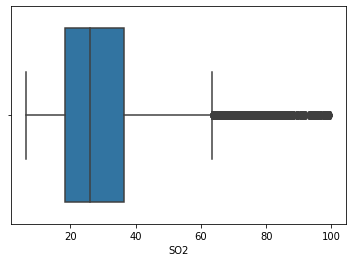

In [ ]:
sns.boxplot(df['SO2'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


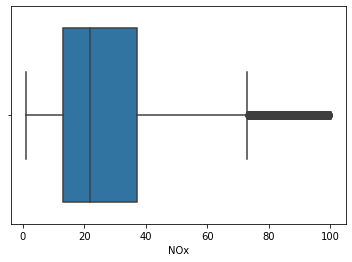

In [ ]:
sns.boxplot(df['NOx'])

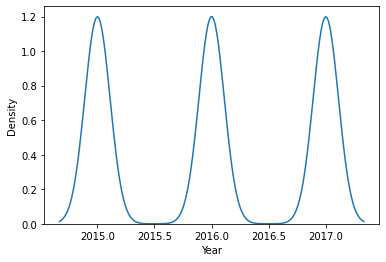

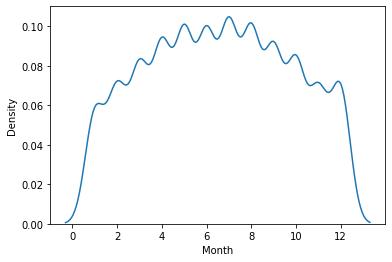

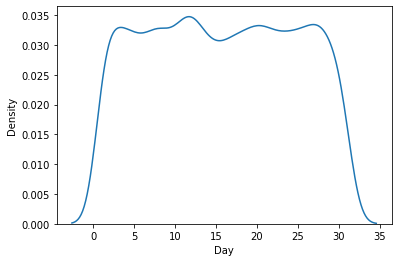

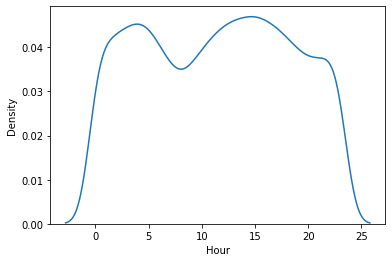

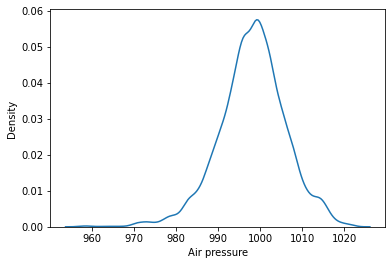

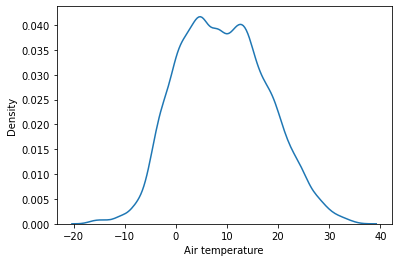

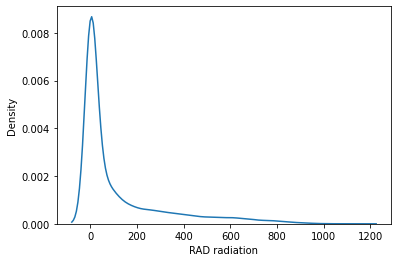

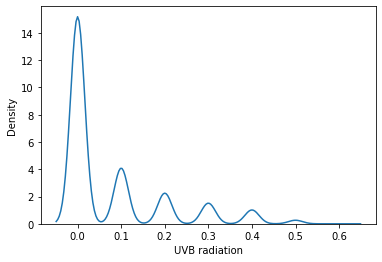

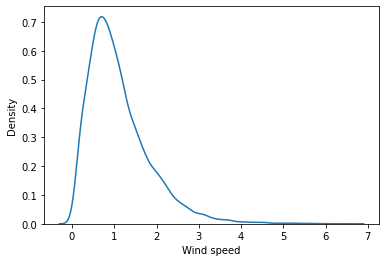

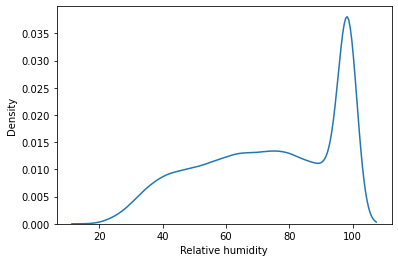

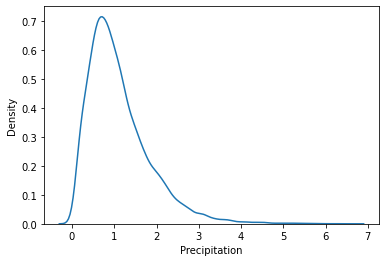

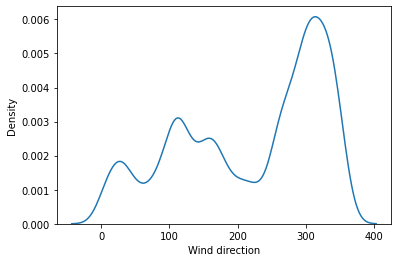

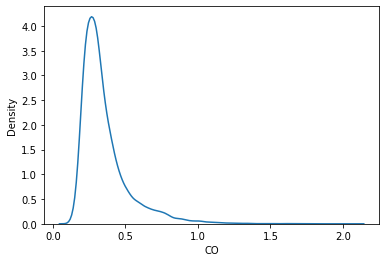

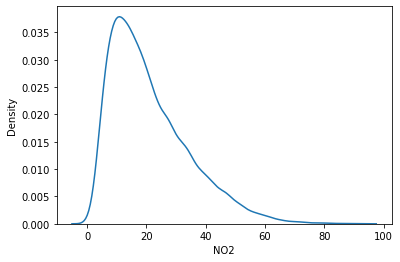

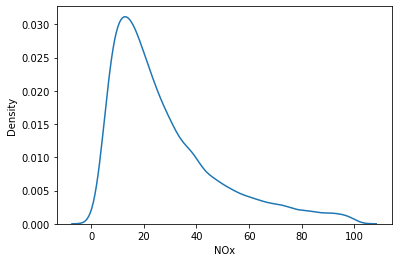

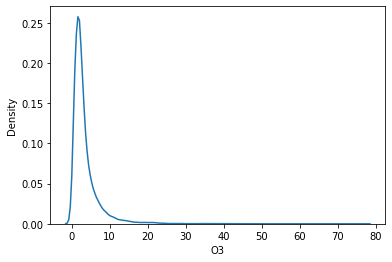

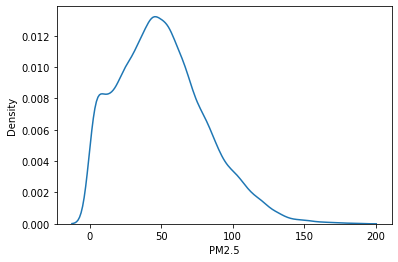

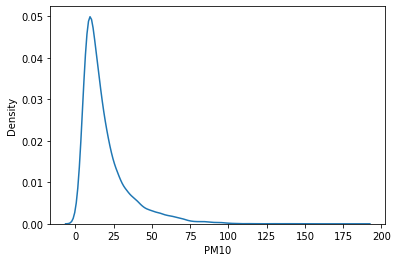

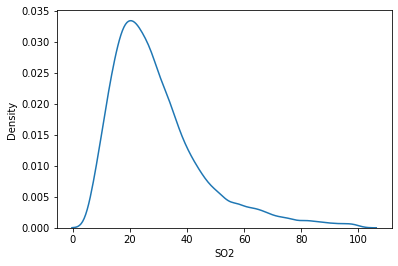

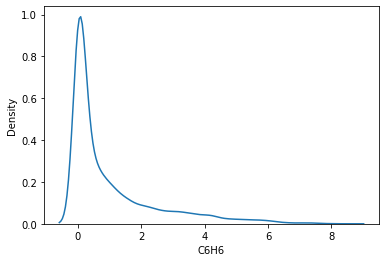

In [ ]:
import seaborn as sns
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.kdeplot(x=col, data=df)

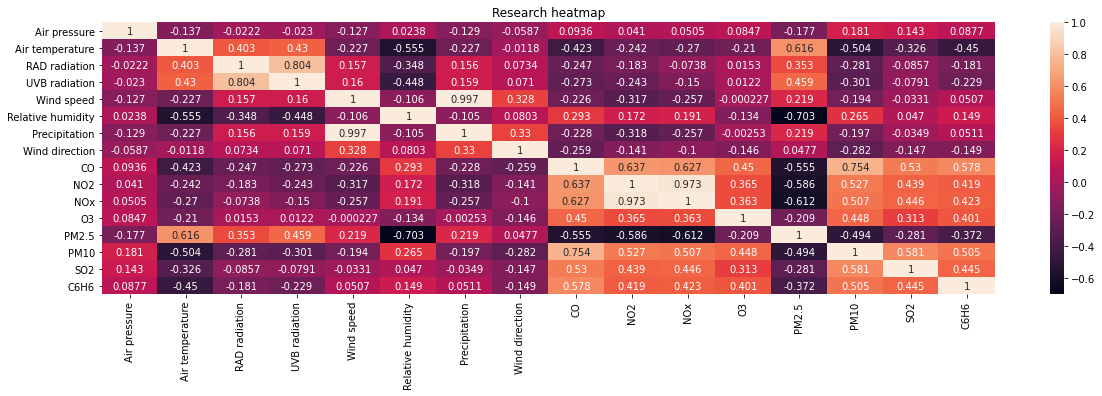

In [ ]:
plt.figure(figsize=(20,5))
heatmap_corr=df.iloc[:,4:]
sns.heatmap(heatmap_corr.corr(method='spearman'),annot=True,fmt='.3g')
plt.title("Research heatmap")
plt.show()


In [ ]:
NOx_features=df.copy().drop(columns=['NO2','SO2','UVB radiation','RAD radiation'])
SO2_features=df.copy().drop(columns=['NO2','NOx','UVB radiation','RAD radiation'])

In [ ]:
(NOx_features['Year']==2016).sum()

7225

# MODEL DLA NOx

In [ ]:
train_dataset_NOx,test_dataset_NOx = train_test_split(NOx_features[NOx_features['Year']==2016], test_size=0.3, random_state=42)

In [ ]:
train_x = train_dataset_NOx.iloc[:,4:].copy()
train_y = train_x.pop('NOx')

test_x = test_dataset_NOx.iloc[:,4:].copy()
test_y = test_x.pop('NOx')

scaler=StandardScaler()
train_x=scaler.fit_transform(train_x)
test_x=scaler.transform(test_x)
#próba przeskalowanie target variable dawała gorsze wyniki

In [ ]:
regression_model1 = tf.keras.Sequential([                           
    layers.Dense(units=128,activation='relu'),
    layers.Dropout(0.1),  
    layers.Dense(units=64,activation='relu'),
    layers.Dense(units=32,activation='relu'),
    layers.Dense(units=32,activation='relu'),
    layers.Dense(units=16,activation='relu'),
    layers.Dense(units=8,activation='relu'),                 
    layers.Dense(units=1)
])

In [ ]:
regression_model1.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.0005),
    loss='mean_squared_error')

In [ ]:
history1 = regression_model1.fit(
    train_x, train_y,
    epochs=200,
    verbose=1,
    validation_split = 0.2)

Epoch 1/200
127/127 [==============================] - 1s 4ms/step - loss: 1052.3794 - val_loss: 235.7169
Epoch 2/200
127/127 [==============================] - 0s 3ms/step - loss: 227.7523 - val_loss: 185.3635
Epoch 3/200
127/127 [==============================] - 0s 3ms/step - loss: 170.9573 - val_loss: 157.4416
Epoch 4/200
127/127 [==============================] - 0s 2ms/step - loss: 141.4095 - val_loss: 148.4678
Epoch 5/200
127/127 [==============================] - 0s 2ms/step - loss: 127.8634 - val_loss: 144.7922
Epoch 6/200
127/127 [==============================] - 0s 3ms/step - loss: 119.8885 - val_loss: 136.7037
Epoch 7/200
127/127 [==============================] - 0s 2ms/step - loss: 118.6482 - val_loss: 132.6727
Epoch 8/200
127/127 [==============================] - 0s 2ms/step - loss: 111.0056 - val_loss: 135.7047
Epoch 9/200
127/127 [==============================] - 0s 2ms/step - loss: 111.4980 - val_loss: 128.3888
Epoch 10/200
127/127 [==============================] 

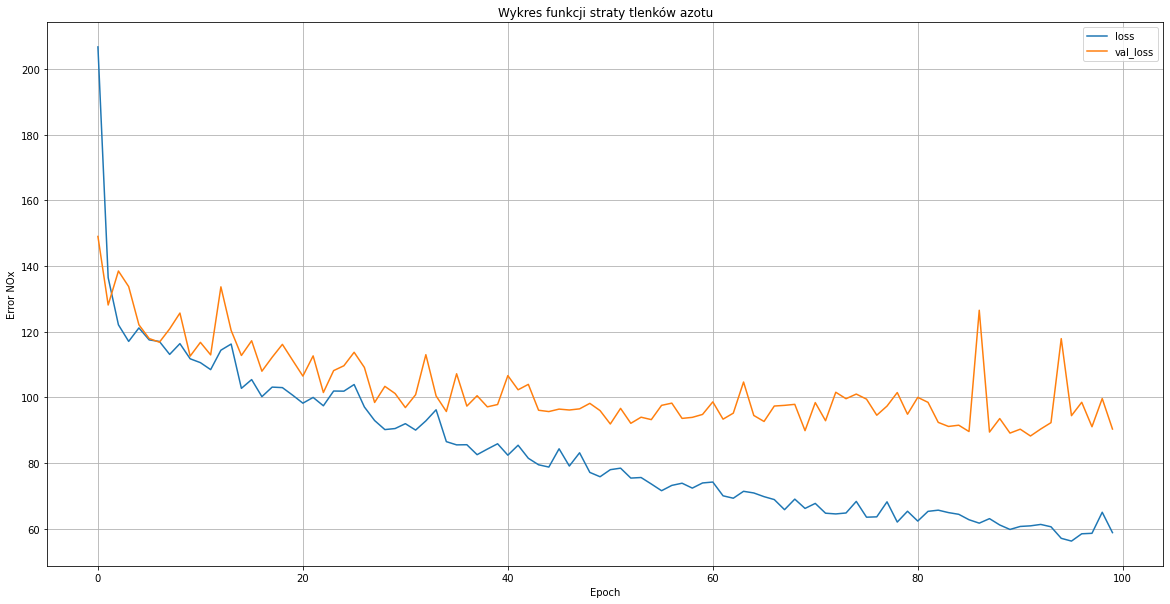

In [ ]:
def plot_loss(history1):
  plt.figure(figsize=(20,10))
  plt.plot(history1.history['loss'], label='loss')
  plt.plot(history1.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.title('Wykres funkcji straty tlenków azotu')
  plt.xlabel('Epoch')
  plt.ylabel('Error NOx')
  plt.legend()
  plt.grid(True)
 
plot_loss(history1)

MAE= 9.810933876681066
RMSE= 13.182474827992992
R2= 0.5397675875440542


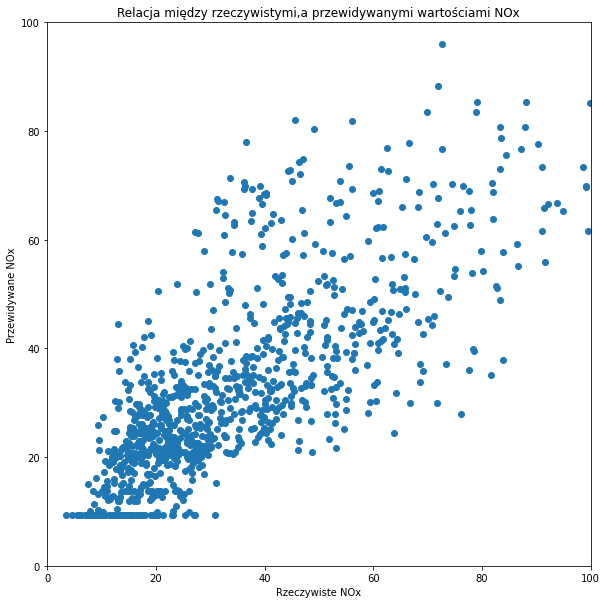

In [ ]:
predictions = regression_model1.predict(test_x).flatten()

NOx_r2=r2_score(test_y,predictions)
NOx_MAE=mean_absolute_error(test_y,predictions)
NOx_RMSE=mean_squared_error(test_y,predictions,squared=False)
plt.figure(figsize=(10,10))
a = plt.axes(aspect='equal')
plt.scatter(test_y, predictions)
plt.xlabel('Rzeczywiste NOx')
plt.ylabel('Przewidywane NOx')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
plt.title('Relacja między rzeczywistymi,a przewidywanymi wartościami NOx')
#_ = plt.plot(lims, lims,'y')
print('MAE=',mean_absolute_error(test_y,predictions))
print('RMSE=',mean_squared_error(test_y,predictions,squared=False))
print("R2=",r2_score(test_y,predictions))

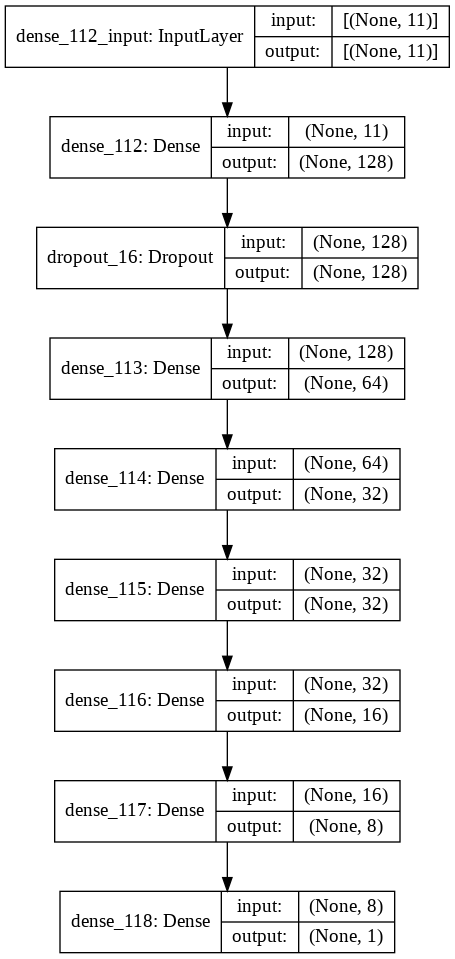

In [ ]:
tf.keras.utils.plot_model(regression_model1,show_shapes=True)

MAE= 9.94227992830036
RMSE= 13.559975214850253
score 0.5598168574973821


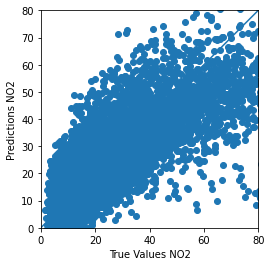

In [ ]:
model = LinearRegression()

model.fit(train_x,train_y)

y_pred = model.predict(test_x)
print('MAE=',mean_absolute_error(test_y,y_pred))
print('RMSE=',mean_squared_error(test_y,y_pred,squared=False))
print("score",r2_score(test_y,y_pred))
NOx_r2_linear=r2_score(test_y,y_pred)
NOx_MAE_linear=mean_absolute_error(test_y,y_pred)
NOx_RMSE_linear=mean_squared_error(test_y,y_pred,squared=False)

a = plt.axes(aspect='equal')
plt.scatter(test_y, y_pred)
plt.xlabel('True Values NO2')
plt.ylabel('Predictions NO2')
lims = [0, 80]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


MAE= 9.942147809502742
RMSE= 13.559938235875807
score 0.5598192583128299


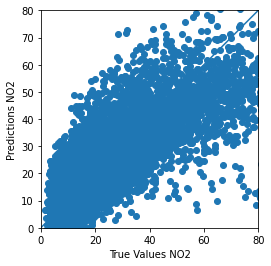

In [ ]:
model = Ridge()
model.fit(train_x,train_y)

y_pred = model.predict(test_x)
print('MAE=',mean_absolute_error(test_y,y_pred))
print('RMSE=',mean_squared_error(test_y,y_pred,squared=False))
print("score",r2_score(test_y,y_pred))
NOx_r2_ridge=r2_score(test_y,y_pred)
NOx_MAE_ridge=mean_absolute_error(test_y,y_pred)
NOx_RMSE_ridge=mean_squared_error(test_y,y_pred,squared=False)


a = plt.axes(aspect='equal')
plt.scatter(test_y, y_pred)
plt.xlabel('True Values NO2')
plt.ylabel('Predictions NO2')
lims = [0, 80]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


MAE= 10.349513583938442
RMSE= 14.1073532209295
score 0.5235616676223501


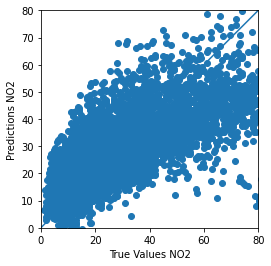

In [ ]:
model = Lasso()
model.fit(train_x,train_y)

y_pred = model.predict(test_x)
print('MAE=',mean_absolute_error(test_y,y_pred))
print('RMSE=',mean_squared_error(test_y,y_pred,squared=False))
print("score",r2_score(test_y,y_pred))
NOx_r2_lasso=r2_score(test_y,y_pred)
NOx_MAE_lasso=mean_absolute_error(test_y,y_pred)
NOx_RMSE_lasso=mean_squared_error(test_y,y_pred,squared=False)


a = plt.axes(aspect='equal')
plt.scatter(test_y, y_pred)
plt.xlabel('True Values NO2')
plt.ylabel('Predictions NO2')
lims = [0, 80]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

MAE= 11.328483275051761
RMSE= 15.236971975764401
score 0.44420715360302876


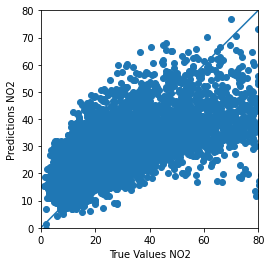

In [ ]:
model = ElasticNet()
model.fit(train_x,train_y)

y_pred = model.predict(test_x)
print('MAE=',mean_absolute_error(test_y,y_pred))
print('RMSE=',mean_squared_error(test_y,y_pred,squared=False))
print("score",r2_score(test_y,y_pred))
NOx_r2_elasticnet=r2_score(test_y,y_pred)
NOx_MAE_elasticnet=mean_absolute_error(test_y,y_pred)
NOx_RMSE_elasticnet=mean_squared_error(test_y,y_pred,squared=False)

a = plt.axes(aspect='equal')
plt.scatter(test_y, y_pred)
plt.xlabel('True Values NO2')
plt.ylabel('Predictions NO2')
lims = [0, 80]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

MAE= 9.774594274504462
RMSE= 14.756056683413858
score 0.47873778541602885


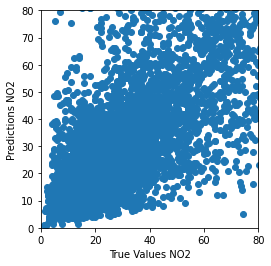

In [ ]:
model = tree.DecisionTreeRegressor()
model.fit(train_x,train_y)

y_pred = model.predict(test_x)
print('MAE=',mean_absolute_error(test_y,y_pred))
print('RMSE=',mean_squared_error(test_y,y_pred,squared=False))
print("score",r2_score(test_y,y_pred))
NOx_r2_decisiontree=r2_score(test_y,y_pred)
NOx_MAE_decisiontree=mean_absolute_error(test_y,y_pred)
NOx_RMSE_decisiontree=mean_squared_error(test_y,y_pred,squared=False)

a = plt.axes(aspect='equal')
plt.scatter(test_y, y_pred)
plt.xlabel('True Values NO2')
plt.ylabel('Predictions NO2')
lims = [0, 80]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

MAE= 7.0250797151332245
RMSE= 10.208879704188604
score 0.7504992888488984


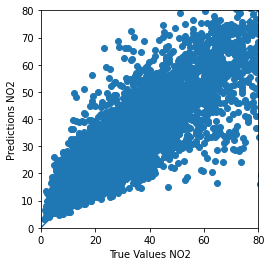

In [ ]:
model = RandomForestRegressor()
model.fit(train_x,train_y)

y_pred = model.predict(test_x)
print('MAE=',mean_absolute_error(test_y,y_pred))
print('RMSE=',mean_squared_error(test_y,y_pred,squared=False))
print("score",r2_score(test_y,y_pred))
NOx_r2_randomforest=r2_score(test_y,y_pred)
NOx_MAE_randomforest=mean_absolute_error(test_y,y_pred)
NOx_RMSE_randomforest=mean_squared_error(test_y,y_pred,squared=False)

a = plt.axes(aspect='equal')
plt.scatter(test_y, y_pred)
plt.xlabel('True Values NO2')
plt.ylabel('Predictions NO2')
lims = [0, 80]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

[08:44:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE= 8.35200824869915
RMSE= 11.737434476155322
score 0.6701913993907388


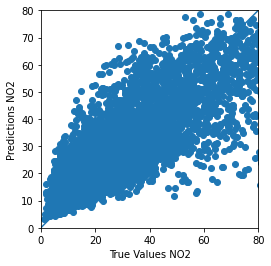

In [ ]:
xgb_r = xg.XGBRegressor() 
xgb_r.fit(train_x, train_y) 
y_pred = xgb_r.predict(test_x) 
print('MAE=',mean_absolute_error(test_y,y_pred))
print('RMSE=',mean_squared_error(test_y,y_pred,squared=False))
print("score",r2_score(test_y,y_pred))
NOx_r2_xgb=r2_score(test_y,y_pred)
NOx_MAE_xgb=mean_absolute_error(test_y,y_pred)
NOx_RMSE_xgb=mean_squared_error(test_y,y_pred,squared=False)
NOx_r2_xgb=r2_score(y_pred,test_y)

a = plt.axes(aspect='equal')
plt.scatter(test_y, y_pred)
plt.xlabel('True Values NO2')
plt.ylabel('Predictions NO2')
lims = [0, 80]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

# Model dla SO2



In [ ]:
train_dataset_SO2,test_dataset_SO2 = train_test_split(SO2_features[SO2_features['Year']==2016], test_size=0.3, random_state=42)


In [ ]:
train_x2 = train_dataset_SO2.iloc[:,4:].copy()
train_y2 = train_x2.pop('SO2')

test_x2 = test_dataset_SO2.iloc[:,4:].copy()
test_y2 = test_x2.pop('SO2')

scaler2=StandardScaler()
train_x2=scaler2.fit_transform(train_x2)
test_x2=scaler2.transform(test_x2)
#próba przeskalowanie target variable dawała gorsze wyniki

In [ ]:
regression_model2 = tf.keras.Sequential([                           
    layers.Dense(units=128,activation='relu'),
    layers.Dropout(0.1),  
    layers.Dense(units=64,activation='relu'),
    layers.Dense(units=32,activation='relu'),
    layers.Dense(units=32,activation='relu'),
    layers.Dense(units=16,activation='relu'),
    layers.Dense(units=8,activation='relu'),                 
    layers.Dense(units=1)
])

In [ ]:
regression_model2.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.0005),
    loss='mean_squared_error')

In [ ]:
history2 = regression_model2.fit(
    train_x2, train_y2,
    epochs=200,
    verbose=1,
    validation_split = 0.2)

Epoch 1/200
379/379 [==============================] - 2s 3ms/step - loss: 709.4597 - val_loss: 186.6479
Epoch 2/200
379/379 [==============================] - 1s 3ms/step - loss: 165.6922 - val_loss: 154.2224
Epoch 3/200
379/379 [==============================] - 1s 3ms/step - loss: 142.0022 - val_loss: 145.9181
Epoch 4/200
379/379 [==============================] - 1s 3ms/step - loss: 130.9224 - val_loss: 132.8187
Epoch 5/200
379/379 [==============================] - 1s 3ms/step - loss: 128.7639 - val_loss: 129.0140
Epoch 6/200
379/379 [==============================] - 1s 3ms/step - loss: 128.6933 - val_loss: 126.8760
Epoch 7/200
379/379 [==============================] - 1s 3ms/step - loss: 124.6163 - val_loss: 127.5150
Epoch 8/200
379/379 [==============================] - 1s 3ms/step - loss: 119.9367 - val_loss: 122.1153
Epoch 9/200
379/379 [==============================] - 1s 3ms/step - loss: 118.7482 - val_loss: 121.6923
Epoch 10/200
379/379 [==============================] -

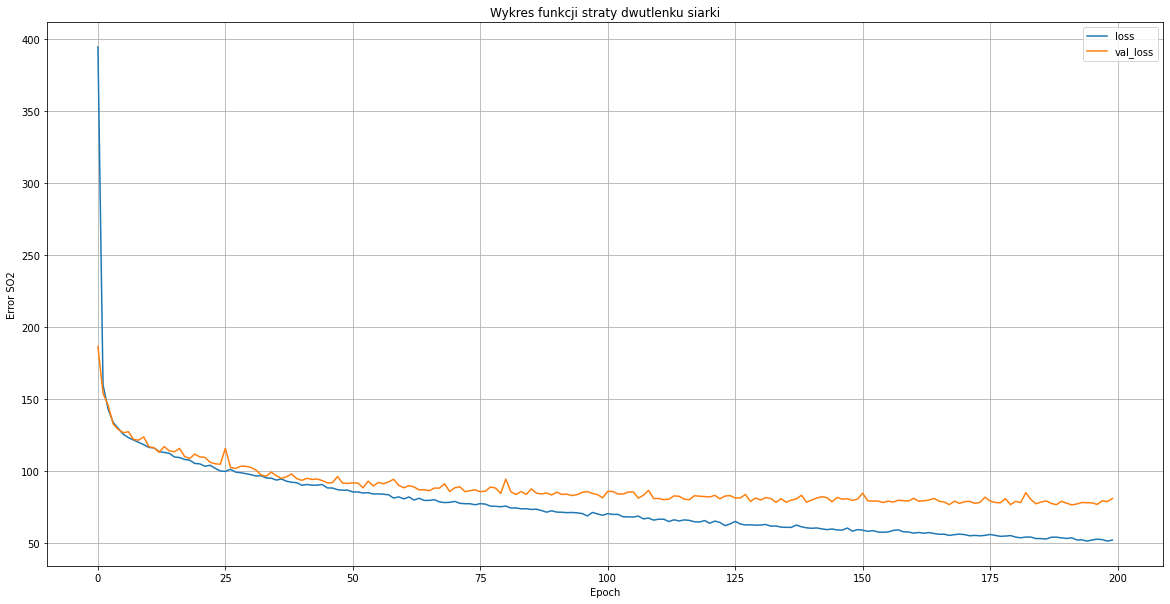

In [ ]:
def plot_loss(history2):
  plt.figure(figsize=(20,10))
  plt.plot(history2.history['loss'], label='loss')
  plt.plot(history2.history['val_loss'], label='val_loss')
  #plt.ylim([0, 20])
  plt.xlabel('Epoch')
  plt.ylabel('Error SO2')
  plt.title('Wykres funkcji straty dwutlenku siarki')
  plt.legend()
  plt.grid(True)

plot_loss(history2)

MAE= 6.270565640625038
RMSE= 9.21278617473446
R2 0.6738248098924863


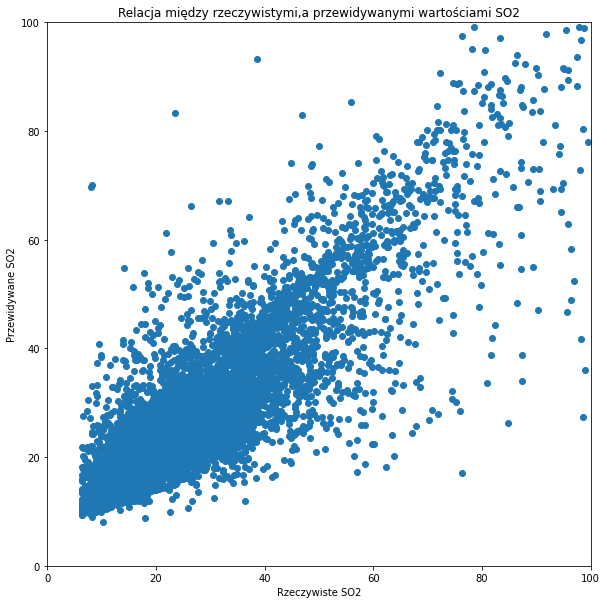

In [ ]:
predictions = regression_model2.predict(test_x2).flatten()


SO2_r2=r2_score(test_y2,predictions)
SO2_MAE=mean_absolute_error(test_y2,predictions)
SO2_RMSE=mean_squared_error(test_y2,predictions,squared=False)
plt.figure(figsize=(10,10))
a = plt.axes(aspect='equal')
plt.scatter(test_y2, predictions)
plt.xlabel('Rzeczywiste SO2')
plt.ylabel('Przewidywane SO2')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
plt.title('Relacja między rzeczywistymi,a przewidywanymi wartościami SO2')
print('MAE=',mean_absolute_error(test_y2,predictions))
print('RMSE=',mean_squared_error(test_y2,predictions,squared=False))
print("R2",r2_score(test_y2,predictions))
#_ = plt.plot(lims, lims,'y')


MAE= 8.600251842836515
RMSE= 12.073267519959492
score 0.4398316219010472


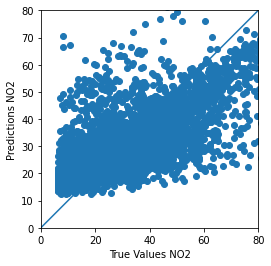

In [ ]:
model = LinearRegression()

model.fit(train_x2,train_y2)

y_pred = model.predict(test_x2)
print('MAE=',mean_absolute_error(test_y2,y_pred))
print('RMSE=',mean_squared_error(test_y2,y_pred,squared=False))
print("score",r2_score(test_y2,y_pred))
SO2_r2_linear=r2_score(test_y2,y_pred)
SO2_MAE_linear=mean_absolute_error(test_y2,y_pred)
SO2_RMSE_linear=mean_squared_error(test_y2,y_pred,squared=False)


a = plt.axes(aspect='equal')
plt.scatter(test_y2, y_pred)
plt.xlabel('True Values NO2')
plt.ylabel('Predictions NO2')
lims = [0, 80]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


MAE= 8.600363842404763
RMSE= 12.07322451451943
score 0.43983561257625803


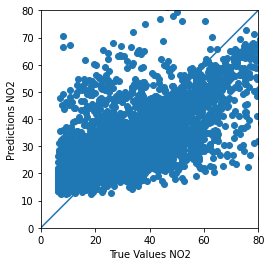

In [ ]:
model = Ridge()
model.fit(train_x2,train_y2)

y_pred = model.predict(test_x2)
print('MAE=',mean_absolute_error(test_y2,y_pred))
print('RMSE=',mean_squared_error(test_y2,y_pred,squared=False))
print("score",r2_score(test_y2,y_pred))
SO2_r2_ridge=r2_score(test_y2,y_pred)
SO2_MAE_ridge=mean_absolute_error(test_y2,y_pred)
SO2_RMSE_ridge=mean_squared_error(test_y2,y_pred,squared=False)

a = plt.axes(aspect='equal')
plt.scatter(test_y2, y_pred)
plt.xlabel('True Values NO2')
plt.ylabel('Predictions NO2')
lims = [0, 80]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


MAE= 8.892995438417246
RMSE= 12.271549069851021
score 0.4212810307769781


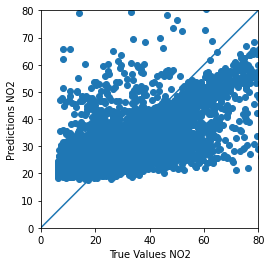

In [ ]:
model = Lasso()
model.fit(train_x2,train_y2)

y_pred = model.predict(test_x2)
print('MAE=',mean_absolute_error(test_y2,y_pred))
print('RMSE=',mean_squared_error(test_y2,y_pred,squared=False))
print("score",r2_score(test_y2,y_pred))
SO2_r2_lasso=r2_score(test_y2,y_pred)
SO2_MAE_lasso=mean_absolute_error(test_y2,y_pred)
SO2_RMSE_lasso=mean_squared_error(test_y2,y_pred,squared=False)

a = plt.axes(aspect='equal')
plt.scatter(test_y2, y_pred)
plt.xlabel('True Values NO2')
plt.ylabel('Predictions NO2')
lims = [0, 80]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


MAE= 9.214752551214247
RMSE= 12.410264302675182
score 0.4081236282747237


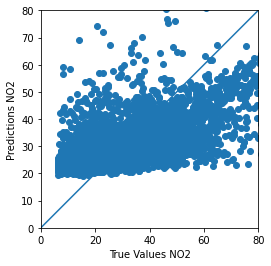

In [ ]:
model = ElasticNet()
model.fit(train_x2,train_y2)

y_pred = model.predict(test_x2)
print('MAE=',mean_absolute_error(test_y2,y_pred))
print('RMSE=',mean_squared_error(test_y2,y_pred,squared=False))
print("score",r2_score(test_y2,y_pred))
SO2_r2_elasticnet=r2_score(test_y2,y_pred)
SO2_MAE_elasticnet=mean_absolute_error(test_y2,y_pred)
SO2_RMSE_elasticnet=mean_squared_error(test_y2,y_pred,squared=False)

a = plt.axes(aspect='equal')
plt.scatter(test_y2, y_pred)
plt.xlabel('True Values NO2')
plt.ylabel('Predictions NO2')
lims = [0, 80]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

MAE= 8.084548730814557
RMSE= 12.19669290939027
score 0.4283198409894151


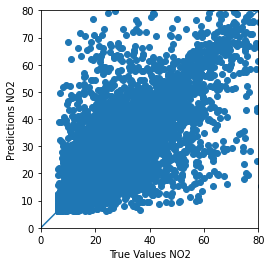

In [ ]:
model = tree.DecisionTreeRegressor()
model.fit(train_x2,train_y2)

y_pred = model.predict(test_x2)
print('MAE=',mean_absolute_error(test_y2,y_pred))
print('RMSE=',mean_squared_error(test_y2,y_pred,squared=False))
print("score",r2_score(test_y2,y_pred))
SO2_r2_decisiontree=r2_score(test_y2,y_pred)
SO2_MAE_decisiontree=mean_absolute_error(test_y2,y_pred)
SO2_RMSE_decisiontree=mean_squared_error(test_y2,y_pred,squared=False)

a = plt.axes(aspect='equal')
plt.scatter(test_y2, y_pred)
plt.xlabel('True Values NO2')
plt.ylabel('Predictions NO2')
lims = [0, 80]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

MAE= 5.803804672147608
RMSE= 8.441508877233321
score 0.7261522958628948


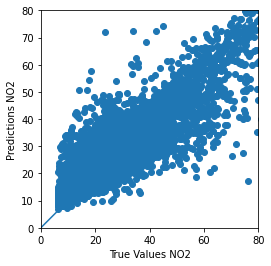

In [ ]:
model = RandomForestRegressor()
model.fit(train_x2,train_y2)

y_pred = model.predict(test_x2)
print('MAE=',mean_absolute_error(test_y2,y_pred))
print('RMSE=',mean_squared_error(test_y2,y_pred,squared=False))
print("score",r2_score(test_y2,y_pred))
SO2_r2_randomforest=r2_score(test_y2,y_pred)
SO2_MAE_randomforest=mean_absolute_error(test_y2,y_pred)
SO2_RMSE_randomforest=mean_squared_error(test_y2,y_pred,squared=False)

a = plt.axes(aspect='equal')
plt.scatter(test_y2, y_pred)
plt.xlabel('True Values NO2')
plt.ylabel('Predictions NO2')
lims = [0, 80]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

[08:56:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE= 7.345131652030042
RMSE= 10.429008812211226
score 0.582020473082361


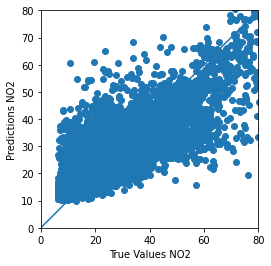

In [ ]:
xgb_r = xg.XGBRegressor() 
xgb_r.fit(train_x2, train_y2) 
y_pred = xgb_r.predict(test_x2) 
print('MAE=',mean_absolute_error(test_y2,y_pred))
print('RMSE=',mean_squared_error(test_y2,y_pred,squared=False))
print("score",r2_score(test_y2,y_pred))
SO2_r2_xgb=r2_score(test_y2,y_pred)
SO2_MAE_xgb=mean_absolute_error(test_y2,y_pred)
SO2_RMSE_xgb=mean_squared_error(test_y2,y_pred,squared=False)

a = plt.axes(aspect='equal')
plt.scatter(test_y2, y_pred)
plt.xlabel('True Values NO2')
plt.ylabel('Predictions NO2')
lims = [0, 80]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

# Porównanie

In [ ]:

df_compare = pd.DataFrame(columns=["NOx","SO2"]) 
df_compare.style.set_caption("R2 score")
df_compare.loc['MLP'] = [NOx_r2, SO2_r2]
df_compare.loc['Linear regression'] = [NOx_r2_linear, SO2_r2_linear]
df_compare.loc['Ridge regression'] = [NOx_r2_ridge, SO2_r2_ridge]
df_compare.loc['Lasso regression'] = [NOx_r2_lasso, SO2_r2_lasso]
df_compare.loc['ElasticNet'] = [NOx_r2_elasticnet, SO2_r2_elasticnet]
df_compare.loc['Decision Tree Regressor'] = [NOx_r2_decisiontree, SO2_r2_decisiontree]
df_compare.loc['Random Forest Regressor'] = [NOx_r2_randomforest, SO2_r2_randomforest]
df_compare.loc['XGBoost regressor'] = [NOx_r2_xgb, SO2_r2_xgb]

In [ ]:
df_compare

,NOx,SO2
MLP,0.752853,0.673825
Linear regression,0.559817,0.439832
Ridge regression,0.559819,0.439836
Lasso regression,0.523562,0.421281
ElasticNet,0.444207,0.408124
Decision Tree Regressor,0.478738,0.428320
Random Forest Regressor,0.750499,0.726152
XGBoost regressor,0.433019,0.582020


In [ ]:
df_compare2 = pd.DataFrame(columns=["NOx","SO2"]) 
df_compare2.style.set_caption("MAE score")
df_compare2.loc['MLP'] = [NOx_MAE, SO2_MAE]
df_compare2.loc['Linear regression'] = [NOx_MAE_linear, SO2_MAE_linear]
df_compare2.loc['Ridge regression'] = [NOx_MAE_ridge, SO2_MAE_ridge]
df_compare2.loc['Lasso regression'] = [NOx_MAE_lasso, SO2_MAE_lasso]
df_compare2.loc['ElasticNet'] = [NOx_MAE_elasticnet, SO2_MAE_elasticnet]
df_compare2.loc['Decision Tree Regressor'] = [NOx_MAE_decisiontree, SO2_MAE_decisiontree]
df_compare2.loc['Random Forest Regressor'] = [NOx_MAE_randomforest, SO2_MAE_randomforest]
df_compare2.loc['XGBoost regressor'] = [NOx_MAE_xgb, SO2_MAE_xgb]

In [ ]:
df_compare2

,NOx,SO2
MLP,6.955287,6.270566
Linear regression,9.942280,8.600252
Ridge regression,9.942148,8.600364
Lasso regression,10.349514,8.892995
ElasticNet,11.328483,9.214753
Decision Tree Regressor,9.774594,8.084549
Random Forest Regressor,7.025080,5.803805
XGBoost regressor,8.352008,7.345132


In [ ]:
df_compare3 = pd.DataFrame(columns=["NOx","SO2"]) 
df_compare3.style.set_caption("RMSE score")
df_compare3.loc['MLP'] = [NOx_RMSE, SO2_RMSE]
df_compare3.loc['Linear regression'] = [NOx_RMSE_linear, SO2_RMSE_linear]
df_compare3.loc['Ridge regression'] = [NOx_RMSE_ridge, SO2_RMSE_ridge]
df_compare3.loc['Lasso regression'] = [NOx_RMSE_lasso, SO2_RMSE_lasso]
df_compare3.loc['ElasticNet'] = [NOx_RMSE_elasticnet, SO2_RMSE_elasticnet]
df_compare3.loc['Decision Tree Regressor'] = [NOx_RMSE_decisiontree, SO2_RMSE_decisiontree]
df_compare3.loc['Random Forest Regressor'] = [NOx_RMSE_randomforest, SO2_RMSE_randomforest]
df_compare3.loc['XGBoost regressor'] = [NOx_RMSE_xgb, SO2_RMSE_xgb]

In [ ]:
df_compare3

,NOx,SO2
MLP,10.160615,9.212786
Linear regression,13.559975,12.073268
Ridge regression,13.559938,12.073225
Lasso regression,14.107353,12.271549
ElasticNet,15.236972,12.410264
Decision Tree Regressor,14.756057,12.196693
Random Forest Regressor,10.208880,8.441509
XGBoost regressor,11.737434,10.429009


In [ ]:
df_compare4 = pd.DataFrame(columns=["NOx","SO2"])
df_compare4.style.set_caption("Model comparison")
df_compare4.loc['MAE'] = [NOx_MAE, SO2_MAE]
df_compare4.loc['RMSE'] = [NOx_RMSE, SO2_RMSE]
df_compare4.loc['R^2']=[NOx_r2, SO2_r2]
df_compare4

,NOx,SO2
MAE,6.955287,6.270566
RMSE,10.160615,9.212786
R^2,0.752853,0.673825


In [ ]:
regression_model1.save('reg1')
regression_model2.save('reg2')

INFO:tensorflow:Assets written to: reg1/assets
INFO:tensorflow:Assets written to: reg2/assets


In [ ]:
df.describe()